In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

/home/sam/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
df = pd.read_csv("data_analyse.csv", index_col=0)

In [103]:
print(df.columns)
df.head(5)

Index(['shares', 'author_name', 'nb_images', 'num_videos', 'num_hrefs',
       'num_keywords', 'chanel', 'day', 'week', 'Topic_nmf other',
       'Topic_nmf family and job', 'Topic_nmf web', 'Topic_nmf apple',
       'Topic_nmf twitter', 'Topic_nmf facebook',
       'Topic_nmf musics and videos', 'Topic_nmf photography',
       'Topic_nmf business', 'Topic_nmf google', 'dominant_topic',
       'Topic_nmf devices telecomunication', 'Topic_nmf politics and society',
       'Topic_nmf sport and gaming', 'Topic_lda Politics and diplomacy',
       'Topic_lda Internet and social media', 'Topic_lda Videos and movies',
       'Topic_lda Telecomunication devices', 'Topic_lda Entertainment',
       'dominant_topic_lda', 'content_polarity', 'abs_content_polarity',
       'content_subjectivity', 'title_polarity', 'abs_title_polarity',
       'title_subjectivity', 'month'],
      dtype='object')


,shares,author_name,nb_images,num_videos,num_hrefs,num_keywords,chanel,day,week,Topic_nmf other,...,Topic_lda Telecomunication devices,Topic_lda Entertainment,dominant_topic_lda,content_polarity,abs_content_polarity,content_subjectivity,title_polarity,abs_title_polarity,title_subjectivity,month
0,711,Seth Fiegerman,1,0.0,3.0,4.0,Business,Monday,0,0.004,...,0.025,0.024,Internet and social media,0.148948,0.148948,0.341246,0.000000,0.000000,0.000000,1
1,1500,Seth Fiegerman,1,0.0,3.0,6.0,Business,Monday,0,0.000,...,0.855,0.033,Telecomunication devices,0.323333,0.323333,0.702222,0.000000,0.000000,0.000000,1
2,1200,Noname,3,0.0,9.0,7.0,Entertainment,Monday,0,0.027,...,0.024,0.365,Politics and diplomacy,0.116975,0.116975,0.421078,0.000000,0.000000,0.000000,1
3,505,Noname,20,0.0,19.0,7.0,Tech,Monday,0,0.058,...,0.923,0.018,Telecomunication devices,0.285637,0.285637,0.516378,0.136364,0.136364,0.454545,1
4,855,Noname,3,0.0,2.0,9.0,Tech,Monday,0,0.000,...,0.813,0.109,Telecomunication devices,0.071184,0.071184,0.437409,0.214286,0.214286,0.642857,1


A partir du data set contenant : 

    'shares', 'author_name', 'nb_images', 'num_videos', 'num_hrefs',
    'num_keywords', 'chanel', 'day', 'week', 'Topic_nmf other',
    'Topic_nmf family and job', 'Topic_nmf web', 'Topic_nmf apple',
    'Topic_nmf twitter', 'Topic_nmf facebook',
    'Topic_nmf musics and videos', 'Topic_nmf photography',
    'Topic_nmf business', 'Topic_nmf google', 'dominant_topic',
    'Topic_nmf devices telecomunication', 'Topic_nmf politics and society',
    'Topic_nmf sport and gaming', 'Topic_lda Politics and diplomacy',
    'Topic_lda Internet and social media', 'Topic_lda Videos and movies',
    'Topic_lda Telecomunication devices', 'Topic_lda Entertainment',
    'dominant_topic_lda', 'content_polarity', 'abs_content_polarity',
    'content_subjectivity', 'title_polarity', 'abs_title_polarity',
    'title_subjectivity', 'month'

Notre objectif va etre de prédire la variable shares. Cette variable étant une variable quantitative, les modèles adaptées seront donc des solutions à des problèmes de régressions. Pour ce faire nous allons donc commencer par effectuer une regression linéaire multiple comme premier modèle. Puis nous utiliserons des modèles non linéaires (arbre de régressions) afin de comparer quel est le type de modèle le plus adapté.
L'enjeux de l'utilisation d'un arbre de régression réside dans le fait de trouver les variables les plus importantes à la prédiction du nombre de partages d'un article.

## Shares : La variables à prédire 

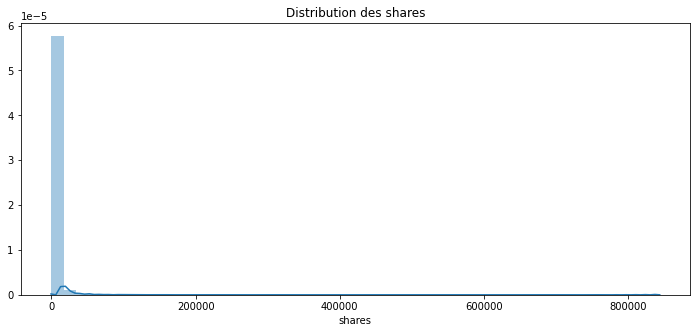

In [5]:
plt.figure(figsize=(12,5))
sns.distplot(df['shares']);
plt.title("Distribution des shares")
plt.show()

Dans un premier temps, un modèle linéaire sera appliqué sur la cible initiale. En raison de la non-linéarité, le modèle formé ne sera pas précis lors de la prédiction. Une fonction logarithmique est utilisée pour linéariser les cibles, ce qui permet une meilleure prédiction même avec un modèle linéaire similaire

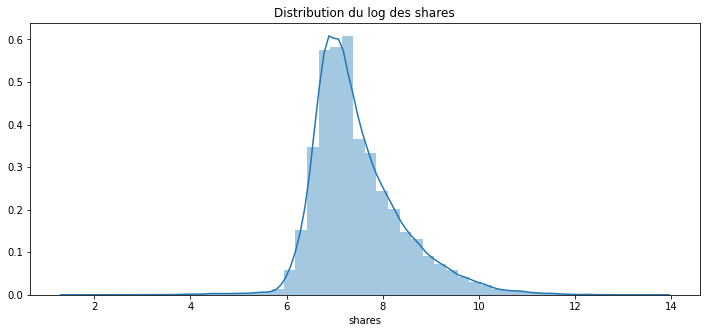

In [6]:
plt.figure(figsize=(12,5))
sns.distplot(np.log(df['shares']))
plt.title("Distribution du log des shares")
plt.show()

## Regression linéaire

Tout d'abord, nous commencerons par un modèle simple : prédire le nombre de partages d'un article à partir des différentes variables quantitaves disponible dans notre jeu de données : le nombre d'images, le nombre de vidéos, le nombre de référence d'un article, le nombre de mots clés, et utiliser un encodage si l'article est publié le week-end ou en semaine, et un second encodage concernant le mois de post de l'article.  

In [108]:
df_X = df[['nb_images','num_videos','num_hrefs','num_keywords','week']]
df_y = np.log(df[['shares']])

# Test/train split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3, random_state=1337)
# nous ajoutons un constante aux X 

print(X_train.shape)
print(X_test.shape)
X_train.head()

(26883, 5)
(11522, 5)


,nb_images,num_videos,num_hrefs,num_keywords,week
1183,1,0.0,6.0,10.0,0
24360,1,0.0,18.0,6.0,0
5871,1,0.0,8.0,6.0,0
27981,2,26.0,124.0,6.0,0
3887,10,1.0,15.0,8.0,0


Pour ce premier modèle, la pratique veut que nous découpions notre jeu de données en deux échantillons : 
- un échantillon de train : ici nous utiliserons 70% du jeu de données. 
- un échantillon de test : ici nous utiliserons 30% du jeu de données. 

Pour chacun des échantillons, il nous faudrat ajouter une constante (intercept) pour que le modèle soit valide. Cette constante est finalement est la valeur moyenne attendue de $Y$ lorsque tous les $X$ sont nuls. Pour une regression simple avec un prédicteur $X$, si $X$ est égal à 0, la constante est simplement la valeur moyenne attendue de $Y$ à cette valeur. Si $X$ n'est pas égal à 0, alors l'intercept n'a pas de signification intrinsèque.

In [109]:
X_train_cst = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_cst).fit()
predictions = model.predict(X_train_cst)
print('mse (sklearn): ', mean_squared_error(predictions,y_train))
model.summary()

mse (sklearn):  0.8537029392412452


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):          5.14e-121
Time:                        15:59:04   Log-Likelihood:                -36019.
No. Observations:               26883   AIC:                         7.205e+04
Df Residuals:                   26877   BIC:                         7.210e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.1859      0.022    320.109      0.000       7.142       7.230
nb_images        0.0010      0.001      1.510      0.131      -0.000       0.002
num_videos       0.0068      0.001      5.015      0.000       0.004       0.009
num_hrefs        0.0073      0.001     14.277      0.000       0.006       0.008
num_keywords     0.0238      0.003      7.967      0.000       0.018       0.030
week             0.2282      0.017     13.645      0.000       0.195       0.261
==============================================================================
Omnibus:                     5066.731   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11514.243
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       5.367   Cond. No.                         69.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On remarque par exemple que 'week' a un effet positif sur le nombre de share. Au meme titre que le nombre d'image, de mots clés, de video et de href ont une influence positive.
- Le MSE est de : 0.853
- Le R2 est de : 0,021

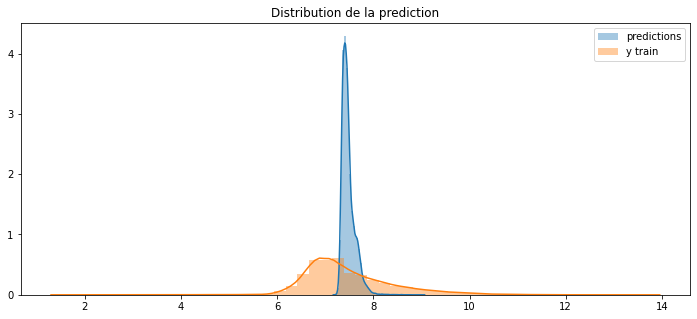

In [9]:
plt.figure(figsize=(12,5))
sns.distplot(predictions, label="predictions")
sns.distplot(df_y, label="y train")
plt.title("Distribution de la prediction")
plt.legend()
plt.show()

## Linear regressor with encoded features
### Statsmodel 

Nous allons ici agrémenter nos données des variabes catégorielles qui nous semble etre pertinente
De nombreux algorithmes de machine learning ne peuvent pas fonctionner directement sur les données des catégorielle. Ils exigent que toutes les variables d'entrée et de sortie soient numériques.

En général, c'est surtout une contrainte d'éfficacité des algorithmes plutôt que des limitations strictes sur les algorithmes eux-mêmes. Cela signifie que les données catégorielles doivent être converties sous une forme numérique.

Il existe deux méthode pour convertir les données : 
- Integer Encoding :

    Dans un premier temps, chaque valeur de catégorie unique se voit attribuer une valeur entière.
    Par exemple, "rouge" est 1, "vert" est 2 et "bleu" est 3. Cette méthode est appelée label encoding ou integer encoding et est facilement réversible.
    Les valeurs entières ont une relation ordonnée naturelle entre elles et les algorithmes peuvent être capables de comprendre et d'exploiter cette relation.
- One-Hot Encoding :

    Pour les variables catégorielles où il n'existe pas de relation ordinale de ce type, le codage des nombres entiers n'est pas suffisant. En fait, l'utilisation de ce codage et le fait de laisser le modèle supposer un ordre naturel entre les catégories peuvent entraîner de mauvaises performances ou des résultats inattendus.
Dans ce cas, un one-hot encoding peut être appliqué. C'est là que la variable codée est entierement supprimée et qu'une nouvelle variable binaire est ajoutée pour chaque valeur unique.
Dans l'exemple de la variable "couleur", il y a 3 catégories et donc 3 variables binaires sont nécessaires. Une valeur "1" est placée dans la variable binaire pour la couleur et des valeurs "0" pour les autres couleurs.


#### Pre processing :

In [110]:
# on pourrait utiliser un encoder et un pipeline ici 
df_X = df[['nb_images', 'num_videos', 'num_hrefs','num_keywords',
           'day',
           'month',
           'chanel',
           'dominant_topic',
          ]]

# pour facilité l'interprétation des mois : 
df_X['month'] = pd.to_datetime(df_X['month'], format='%m').dt.month_name().str.slice(stop=3)

df_X = pd.get_dummies(data=df_X, columns=['day', 
                                          'month',
                                          'chanel',
                                          'dominant_topic',
                                         ], prefix = 'is')

df_y = np.log(df[['shares']])

# Test/train split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3, random_state=1337)

print(X_train.shape)
print(X_test.shape)
df_X.head(2)

(26883, 44)
(11522, 44)


,nb_images,num_videos,num_hrefs,num_keywords,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,...,is_facebook,is_family and job,is_google,is_musics and videos,is_other,is_photography,is_politics and society,is_sport and gaming,is_twitter,is_web
0,1,0.0,3.0,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0.0,3.0,6.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nous avons effectué un one-hot encoding pour les variables 'day', 'month', 'chanel' et 'dominant_topic' à l'aide de de la fonction de pandas get_dummies. Et à nouveau divisé notre dataset en train/test.

#### Stat model OLS

In [112]:
# nous ajoutons un constante au X_train 
X_train_cst = sm.add_constant(X_train)
model = sm.OLS(y_train, sm.add_constant(X_train_cst)).fit()
predictions = model.predict(X_train_cst)
#print(model.summary())
print('mse (sklearn): ', mean_squared_error(predictions,y_train))
#plt.figure(figsize=(12,5))
#sns.distplot(predictions, label="predictions")
#sns.distplot(df_y, label="y train")
#plt.title("Distribution de la prediction")
#plt.legend()
#plt.show()

mse (sklearn):  0.8431002341189417


Il faudra mettre un petit mot ici 

###  Sklearn LinearRegression
Utilison maintenant un autre modele de la bibiotheque Sklearn. 

In [93]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_train)
print("R2 score   : ",round(model.score(X_test, y_test),4))
print('MSE train  : ',round( mean_squared_error(predictions,y_train),4))
print('MSE test   : ',round( mean_squared_error(lm.predict(X_test),y_test),4))

R2 score   :  0.0309
MSE train  :  0.8431
MSE test   :  0.8086


#### Cross validation
La Cross validation, est une technique de validation de modèle qui permet d'évaluer les résultats d'un modèle  généralisé à un ensemble de données indépendant. Elle est principalement utilisée dans des contextes où l'objectif est la prédiction et où l'on veut estimer la précision d'un modèle prédictif dans la pratique

In [114]:
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(lm, df_X, df_y, cv=10, scoring='neg_mean_squared_error') #['train_score', 'test_score'].mean()

print('mse : ', -scores.mean())

rmse_scores = np.sqrt(-scores)

print(
    f"RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}"
)

mse :  7.072515282403405e+16
RMSE: 84098248.6274 +/- 252294743.1118


La aussi faurdrait revenir dessus ... 

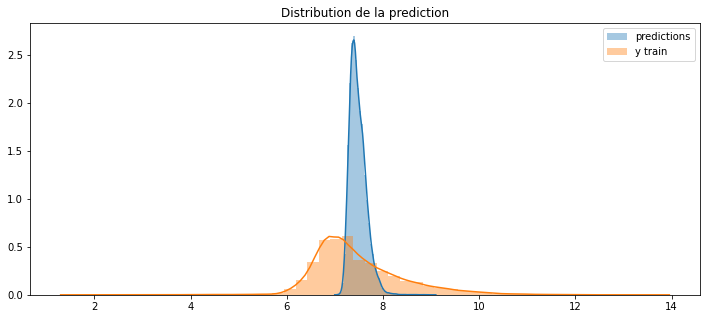

In [95]:
plt.figure(figsize=(12,5))
sns.distplot(predictions, label="predictions")
sns.distplot(df_y, label="y train")
plt.title("Distribution de la prediction")
plt.legend()
plt.show()

## Regression non linéaire 
### Random  Forest Regressor  
La régression non linéaire a pour but d’ajuster un modèle non linéaire pour un ensemble de
valeurs afin de déterminer la courbe qui se rapproche le plus de celle des données de Y en
fonction de x.

In [136]:
from sklearn.ensemble import RandomForestRegressor

# hyper parametres
n_estimators = 10
max_depth = 10
max_features = 5

regressor = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
)

df_X = df[['nb_images', 'num_videos', 'num_hrefs','num_keywords','week',
           'month','chanel','dominant_topic', 'author_name']]
# pour facilité l'interprétation des mois : 
df_X['month'] = pd.to_datetime(df_X['month'], format='%m').dt.month_name().str.slice(stop=3)
df_X = pd.get_dummies(data=df_X, columns=['month',
                                          'chanel',
                                          'author_name',
                                          'dominant_topic',
                                         ], prefix = 'is')
df_y = np.log(df[['shares']])

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3, random_state=1337)
model = regressor.fit(X_train, y_train)
predictions = regressor.predict(X_train)

print("R2 score   : ",round(model.score(X_test, y_test),4))
print('MSE train  : ',round( mean_squared_error(predictions,y_train),4))
print('MSE test   : ',round( mean_squared_error(regressor.predict(X_test),y_test),4))
print(
    f"RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}"
)

R2 score   :  0.0257
MSE train  :  0.7457
MSE test   :  0.8129
RMSE: 84098248.6274 +/- 252294743.1118


Permutation feature importance est une technique d'inspection du modèle. Cette technique est particulièrement utile pour les estimateurs non linéaires. La permutation feature importance est définie comme étant la diminution du score d'un modèle lorsqu'une feature est mélangée de manière aléatoire. Cette procédure rompt la relation entre les features et la cible, la diminution du score du modèle est donc un indicateur de la mesure dans laquelle le modèle dépend de la feature. 
La fonction permutation_importance calcule l'importance des caractéristiques des estimateurs pour un ensemble de données donné.

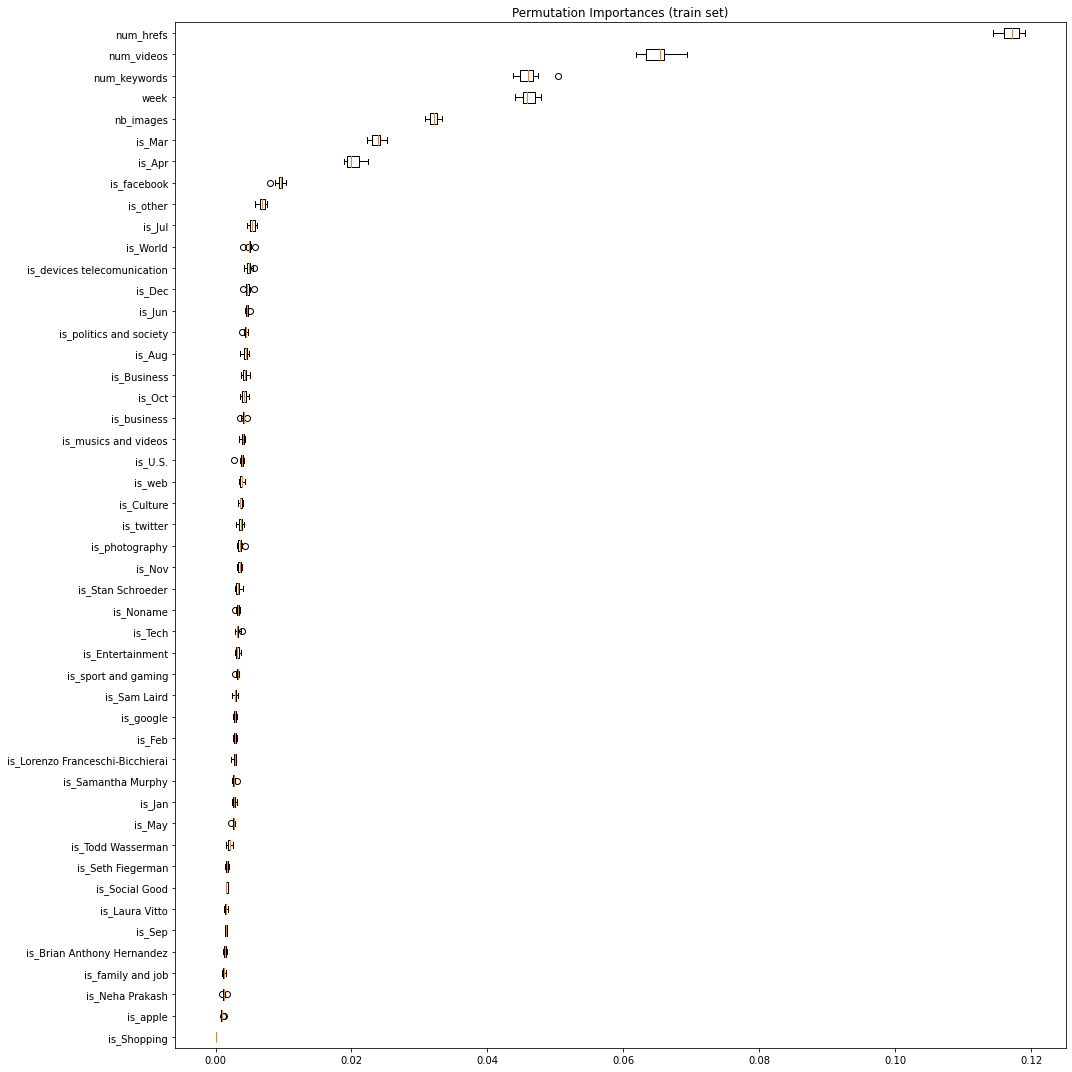

In [139]:
from sklearn.inspection import permutation_importance

feature_importances = permutation_importance(
    regressor, X_train, y_train, n_repeats=10
)
sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15,15))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

On remarque ici que les données que nous avons encodé semble moins pertinente que les données numérique initals. On peut donc en conclure que se sont elles qui sont le plus discriminante.

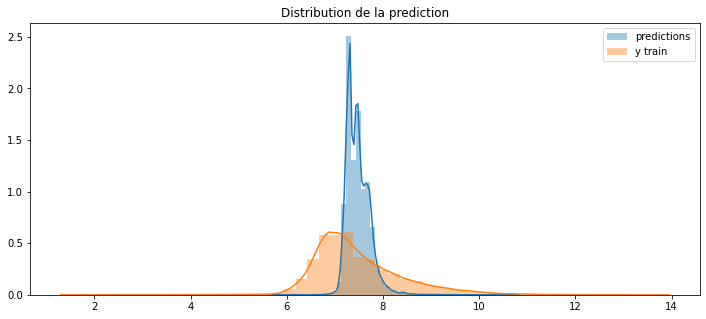

In [121]:
plt.figure(figsize=(12,5))
sns.distplot(predictions, label="predictions")
sns.distplot(df_y, label="y train")
plt.title("Distribution de la prediction")
plt.legend()
plt.show()

#### Cross validation sur le random forest

In [54]:
n_estimators = 10
max_depth = 10
max_features = 10

regressor = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    max_features=max_features
)
scores = cross_val_score(
    regressor, df_X, df_y, cv=10, scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-scores)
print(
    f"RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}"
)

RMSE: 0.9204 +/- 0.0553


## Random Forest topcis NMF et sentiments
Interessons nous maintenant au topics NMF. Nous allons les couplés à l'analyse de sentiment pour essayer de prédire au mieux le nombre de partage. 

In [141]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 10
max_depth = 10
max_features = 5

regressor = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    #max_features=max_features
)

df_X = df[['Topic_nmf other','Topic_nmf family and job', 'Topic_nmf web', 'Topic_nmf apple',
           'Topic_nmf twitter', 'Topic_nmf facebook','Topic_nmf musics and videos',
           'Topic_nmf photography','Topic_nmf business', 'Topic_nmf google',
           'Topic_nmf devices telecomunication', 'Topic_nmf politics and society',
           'Topic_nmf sport and gaming',
           'content_polarity', 'abs_content_polarity','content_subjectivity',
           'title_polarity', 'abs_title_polarity','title_subjectivity']]

df_y = np.log(df[['shares']])

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3, random_state=1337)

model = regressor.fit(X_train, y_train)

predictions = regressor.predict(X_train)

#print(model.feature_importances_)

print("R2 score   : ",round(model.score(X_test, y_test),4))
print('MSE train  : ',round( mean_squared_error(predictions,y_train),4))
print('MSE test   : ',round( mean_squared_error(regressor.predict(X_test),y_test),4))
print(
    f"RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}"
)

R2 score   :  -0.0092
MSE train  :  0.7905
MSE test   :  0.8421
RMSE: 84098248.6274 +/- 252294743.1118


RMSE < 0 ? 

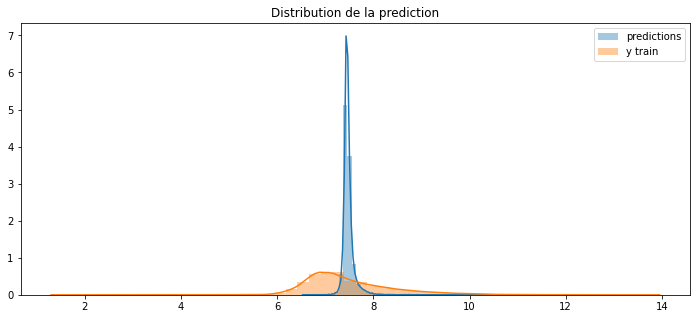

In [132]:
plt.figure(figsize=(12,5))
sns.distplot(predictions, label="predictions")
sns.distplot(df_y, label="y train")
plt.title("Distribution de la prediction")
plt.legend()
plt.show()

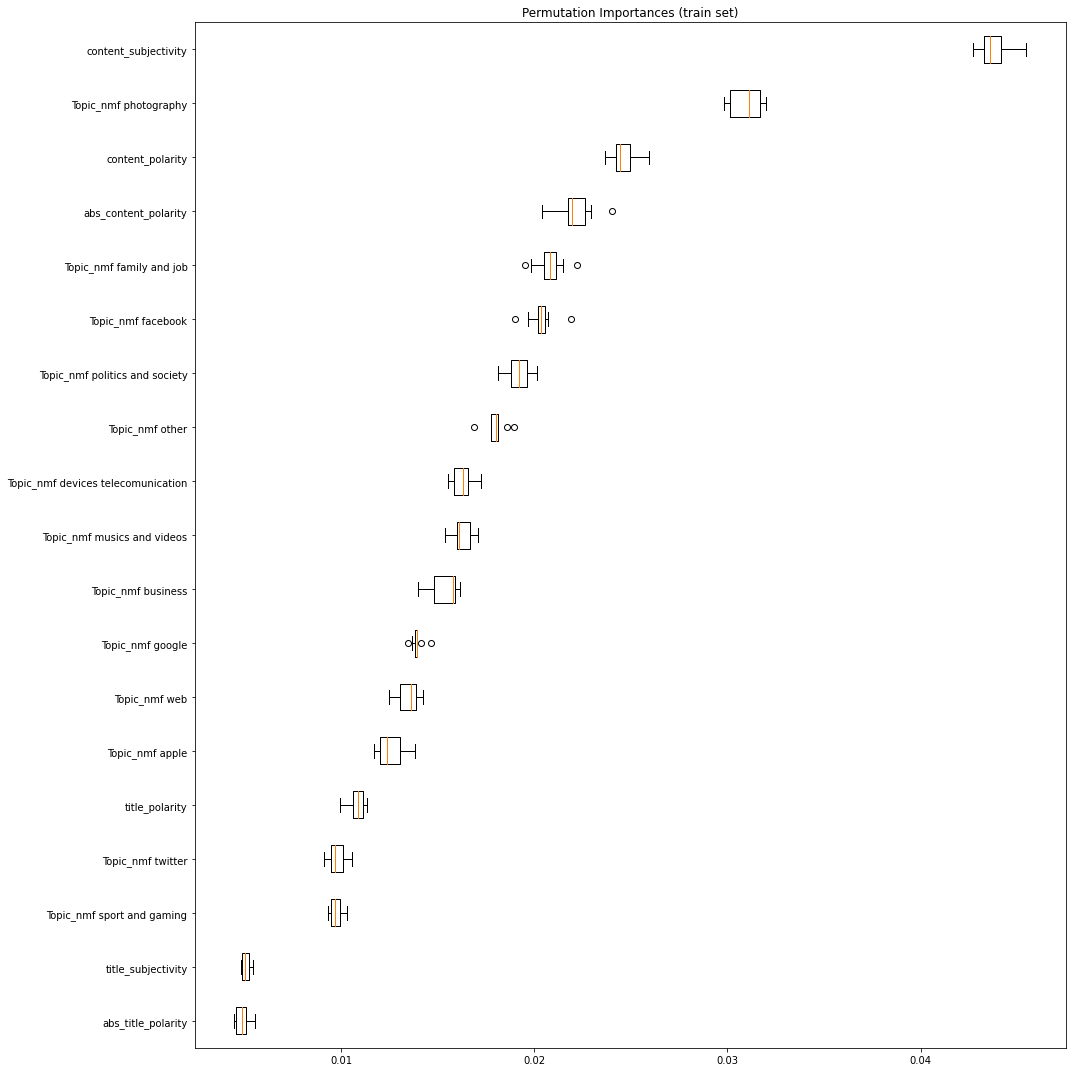

In [142]:
from sklearn.inspection import permutation_importance

feature_importances = permutation_importance(
    regressor, X_train, y_train, n_repeats=10
)
sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15,15))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()   

## Random Forest topcis LDA et sentiments 

In [144]:
from sklearn.ensemble import RandomForestRegressor

df_X = df[['Topic_lda Internet and social media', 'Topic_lda Videos and movies',
           'Topic_lda Telecomunication devices', 'Topic_lda Entertainment','Topic_lda Politics and diplomacy',
           'content_polarity', 'abs_content_polarity','content_subjectivity',
           'title_polarity', 'abs_title_polarity','title_subjectivity']]
# pour facilité l'interprétation des mois : 
#df_X['month'] = pd.to_datetime(df_X['month'], format='%m').dt.month_name().str.slice(stop=3)
#df_X = pd.get_dummies(data=df_X, columns=['author_name', 'chanel','month'], prefix = 'is')

df_y = np.log(df[['shares']])

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3, random_state=1337)

n_estimators = 10
max_depth = 10
max_features = 5

regressor = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    #max_features=max_features
)
model = regressor.fit(X_train, y_train)
predictions = regressor.predict(X_train)

#print(model.feature_importances_)

print("R2 score   : ",round(model.score(X_test, y_test),4))
print('MSE train  : ',round( mean_squared_error(predictions,y_train),4))
print('MSE test   : ',round( mean_squared_error(regressor.predict(X_test),y_test),4))
print(
    f"RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}"
)


R2 score   :  -0.0148
MSE train  :  0.7896
MSE test   :  0.8468
RMSE: 84098248.6274 +/- 252294743.1118


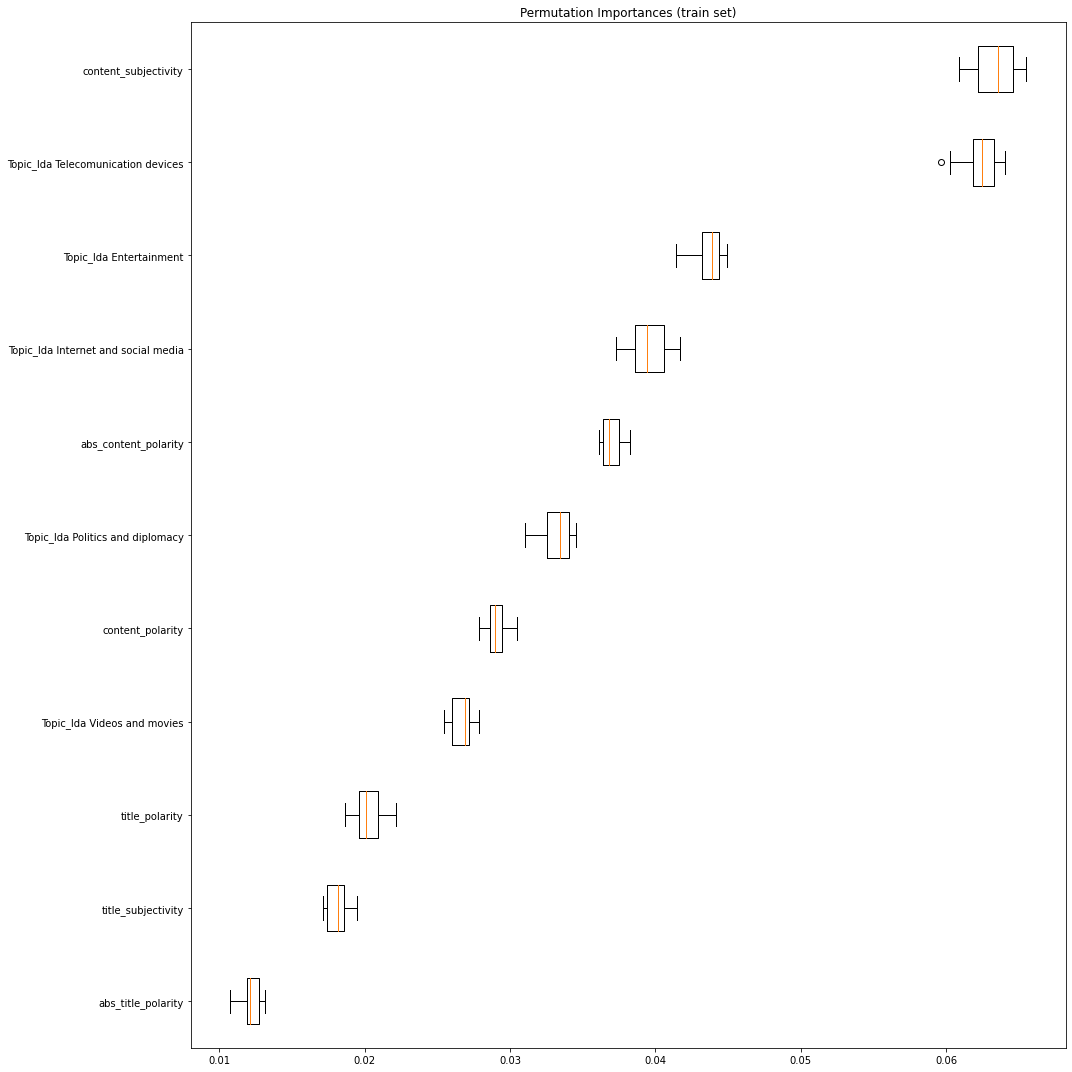

In [145]:
from sklearn.inspection import permutation_importance

feature_importances = permutation_importance(
    regressor, X_train, y_train, n_repeats=10
)
sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15,15))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Model final 
L'idée ici va etre de mettre toutes les variables dans le modele

In [164]:
# pre processing : 
from sklearn.ensemble import RandomForestRegressor

df_X_all = df.drop(columns=['shares', 'day']).copy()

df_X_all['month'] = pd.to_datetime(df_X_all['month'], format='%m').dt.month_name().str.slice(stop=3)
df_X_all = pd.get_dummies(data=df_X_all, columns=[
    'month','author_name', 'chanel', 'dominant_topic', 'dominant_topic_lda',
], prefix = 'is')
print(df_X_all.shape)


df_y = np.log(df[['shares']])

X_train, X_test, y_train, y_test = train_test_split(df_X_all,df_y,test_size=0.3, random_state=1337)

n_estimators = 10
max_depth = 10
max_features = 5

regressor = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    #max_features=max_features
)
model = regressor.fit(X_train, y_train)
predictions = regressor.predict(X_train)

#print(model.feature_importances_)

print("R2 score   : ",round(model.score(X_test, y_test),4))
print('MSE train  : ',round( mean_squared_error(predictions,y_train),4))
print('MSE test   : ',round( mean_squared_error(regressor.predict(X_test),y_test),4))
print(
    f"RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}"
)

(38405, 77)
R2 score   :  0.0189
MSE train  :  0.7289
MSE test   :  0.8186
RMSE: 84098248.6274 +/- 252294743.1118


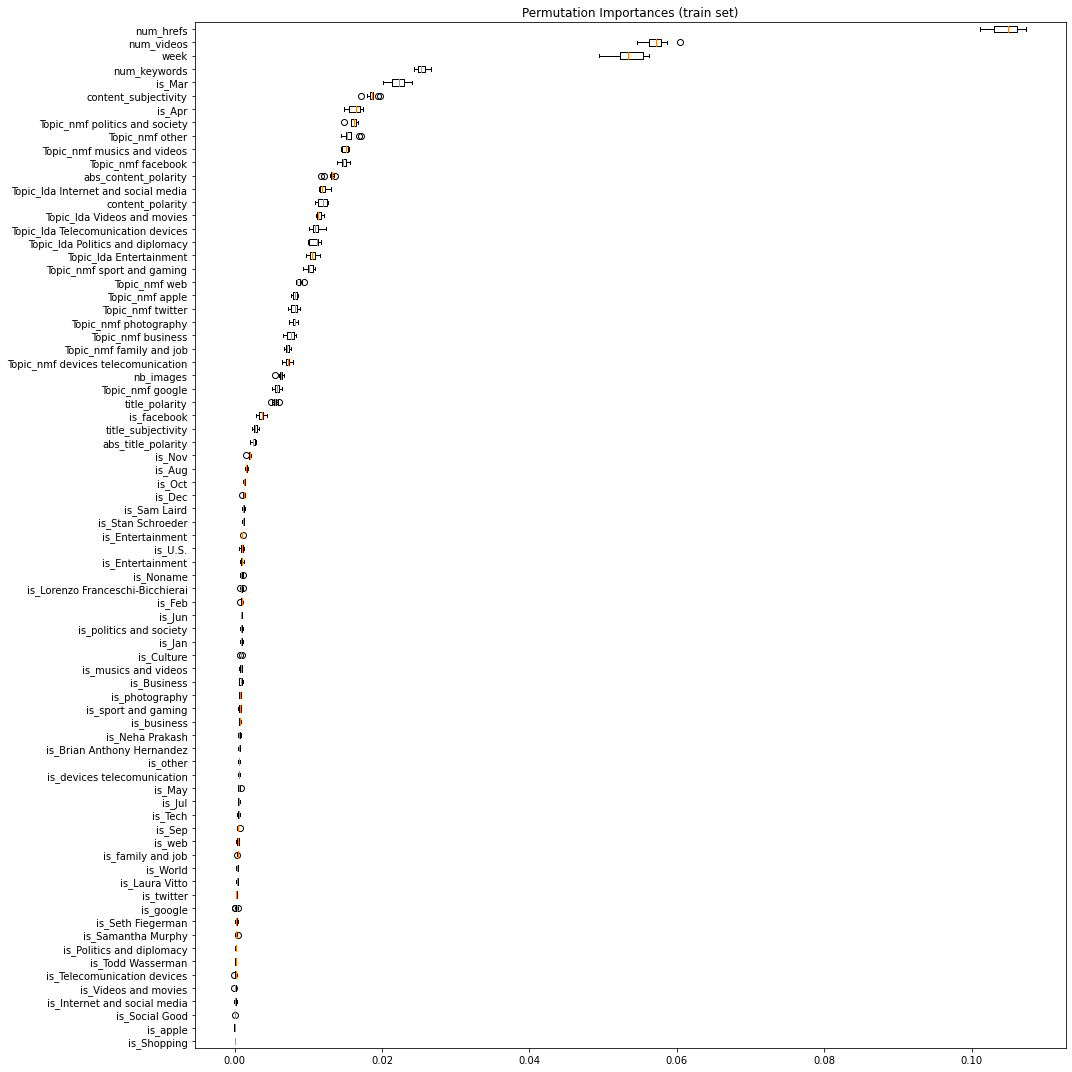

In [168]:
from sklearn.inspection import permutation_importance

feature_importances = permutation_importance(
    regressor, X_train, y_train, n_repeats=10
)
sorted_idx = feature_importances.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15,15))
ax.boxplot(feature_importances.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

Afin d'ajouter de la parcimonie, nous n'avons gardé ici que les 30 variables les plus importantes selon feature_importances.

In [169]:
df_X_min = df_X_all[X_train.columns[sorted_idx][-30:]]

df_y = np.log(df[['shares']])

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3, random_state=1337)

n_estimators = 10
max_depth = 10
max_features = 5

regressor = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    #max_features=max_features
)
model = regressor.fit(X_train, y_train)
predictions = regressor.predict(X_train)

#print(model.feature_importances_)

print("R2 score   : ",round(model.score(X_test, y_test),4))
print('MSE train  : ',round( mean_squared_error(predictions,y_train),4))
print('MSE test   : ',round( mean_squared_error(regressor.predict(X_test),y_test),4))
print(
    f"RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}"
)

R2 score   :  0.0204
MSE train  :  0.7312
MSE test   :  0.8174
RMSE: 84098248.6274 +/- 252294743.1118


Nous avons donc un model avec 30 variables qui obtient un MSE de 0.73 en train et 0.81 en test

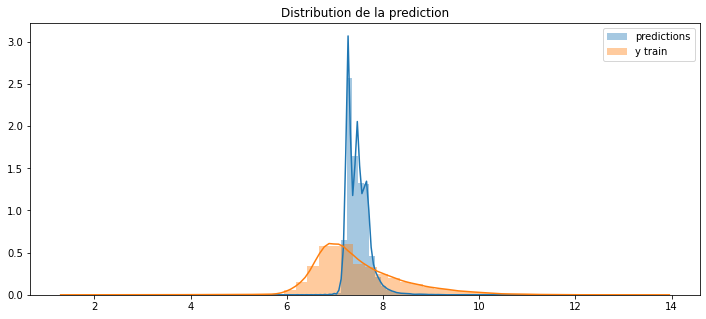

In [172]:
plt.figure(figsize=(12,5))
sns.distplot(predictions, label="predictions")
sns.distplot(df_y, label="y train")
plt.title("Distribution de la prediction")
plt.legend()
plt.show()

In [173]:
Pour améliorer ? 

SyntaxError: invalid syntax (<ipython-input-173-4fddbe3b4c4f>, line 1)